# Notes

In [1]:
# Useful imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from constants import *
from utils.publication_functions import beautify_data_column_name
from sklearn.cluster import KMeans
from flows.specific.custom_flow import CustomFlow

# Data sources
from data_sources.specific.coca import Coca
from data_sources.specific.gold_stock_price import GoldStockPrice
from data_sources.specific.malaria_cases import Malaria
from data_sources.specific.mock_malaria_cases import MockMalaria
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.temperature_max import TemperatureMax
from data_sources.specific.temperature_min import TemperatureMin
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.precipitation_average import PrecipitationAverage
from data_sources.specific.precipitation_total import PrecipitationTotal
from data_sources.specific.deforestation_average import DeforestationAverage
from data_sources.specific.deforestation_total import DeforestationTotal
from data_sources.specific.fb_mobility import FBMobility

# Embedders
from embedders.specific.identity_embedder import IdentityEmbbeder
from embedders.specific.linear_regression_coefficient_embedder import LinearRegressionCoefficientEmbedder
from embedders.specific.mobility_to_distance_embedder import MobilityToDistanceEmbeder
from embedders.specific.mobility_to_similarity_embedder import MobilityToSimilarityEmbeder

# Clusteres
from clusterers.specific.identity_clusterer import IdentityClusterer
from clusterers.specific.sklearn_vector_clusterer import SklearnVectorClusterer
from clusterers.specific.two_tier_dbscan_clusterer import TwoTierDBSCANClusterer
from clusterers.specific.similarity_community_clusterer import SimilarityCommunityClusterer

# Geographies
from geography.specific.colombian_municipalities import ColombianMunicipalities
from geography.general.geography_from_flow_output import GeographyFromFlowOutput



/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
fuentes_incluidas = [TemperatureAverage, TemperatureMax, TemperatureMin, PrecipitationAverage, PrecipitationTotal, Malaria]
target_col = 'malaria_num_cases_total'

In [3]:

included_sources = [TemperatureAverage, PrecipitationAverage, Coca,  GoldStockPrice, DeforestationAverage, Malaria]
included_matrix_sources = []
target_col = 'malaria_num_cases_sum'
target_mobility_col = "fb_mobility_movement"

flow = CustomFlow(ID = 'basic_malaria',
                    name = "Basic Malaria",
                    time_resolution = MONTH,
                    #geography= GeographyFromFlowOutput('municipality_mobility_regions', 'Mobility Regions', flow1),
                    geography = ColombianMunicipalities(),
                    vector_data_sources=included_sources,
                    matrix_data_sources=included_matrix_sources,
                    embedder=LinearRegressionCoefficientEmbedder(target_col=target_col),
                    clusterer=SklearnVectorClusterer(ID="kmeans", name="K-Means", sklearn_clusterer= KMeans(n_clusters=5)))

flow.run()

Starts Flow: Basic Malaria
   Loads Initial Geography
   Loads Data
      Loads Vector Data
      Found 6 elements
         Extracts 1 of 6: Mean Temperature (temperature_mean) 
         Extracts 2 of 6: Precipitation Average (precipitation_average) 
         Extracts 3 of 6: Coca (coca) 
         Extracts 4 of 6: Gold Stock Price (gold_stock_price) 
         Extracts 5 of 6: Deforestation Average (deforestation_average) 
         Loads Data


<AxesSubplot:>

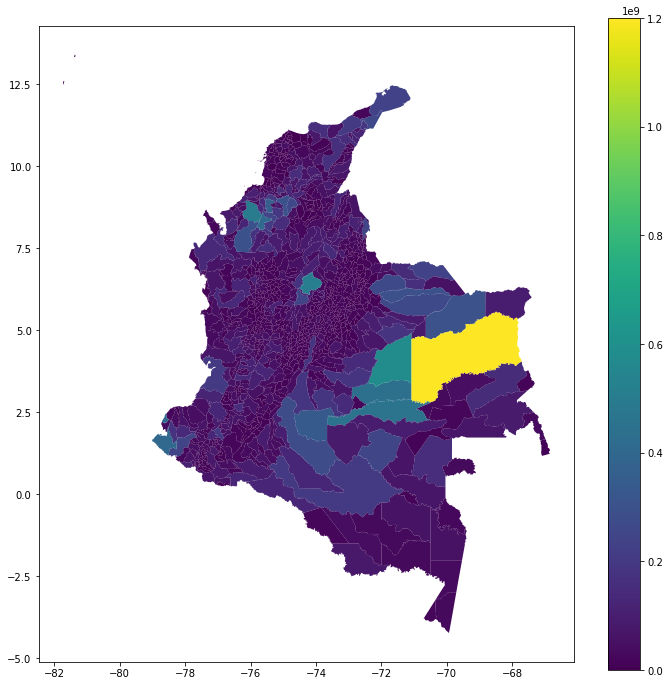

In [11]:
date = pd.to_datetime('2001-07-31')
df_geo = flow.initial_geometry.merge(flow.df_vector)
column = 'deforestation_average_deforestation_average'
df_geo[df_geo.date == date].plot(figsize = (12,12), column = column, legend = True)

<AxesSubplot:>

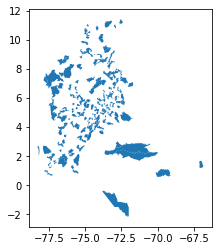

In [22]:
df_temp = flow.initial_geometry[['geometry','depto_id']].sample(250)
df_temp['depto_id'] = 1
df_temp.plot()

In [12]:
enclosing_geo = flow.initial_geometry[['geometry']].dissolve()

In [20]:
import geopandas





,date,geometry
0,2020-01-03,"MULTIPOLYGON (((-76.65168 0.25059, -76.65445 0..."


<AxesSubplot:>

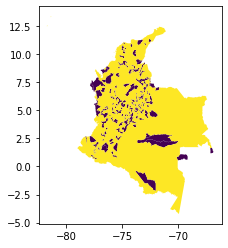

In [24]:
geo_diff = enclosing_geo.geometry.difference(df_temp[['geometry']].dissolve())

df_temp = pd.concat((df_temp, geopandas.GeoDataFrame(pd.DataFrame({'date': ['2020-01-03']}), geometry = geo_diff)), ignore_index= True)

df_temp.fillna(2).plot(column = 'depto_id')

In [4]:
df_geo = flow.initial_geometry.merge(flow.df_vector)
df_geo

,ID,dep_name,muni_name,depto_id,geometry,date,temperature_mean_temperature_average,precipitation_average_precipitation_average,coca_coca_total,gold_stock_price_value,deforestation_average_deforestation_average,malaria_num_cases_sum
0,5467,Antioquia,Montebello,5,"POLYGON ((-75.57280 6.02282, -75.57272 6.02285...",2000-01-31,290.116171,6.532256e+08,0.0,NaN,NaN,NaN
1,5467,Antioquia,Montebello,5,"POLYGON ((-75.57280 6.02282, -75.57272 6.02285...",2000-02-29,290.165941,8.482093e+08,0.0,NaN,NaN,NaN
2,5467,Antioquia,Montebello,5,"POLYGON ((-75.57280 6.02282, -75.57272 6.02285...",2000-03-31,290.654127,9.244660e+08,0.0,NaN,NaN,NaN
3,5467,Antioquia,Montebello,5,"POLYGON ((-75.57280 6.02282, -75.57272 6.02285...",2000-04-30,290.834219,8.537281e+08,0.0,NaN,NaN,NaN
4,5467,Antioquia,Montebello,5,"POLYGON ((-75.57280 6.02282, -75.57272 6.02285...",2000-05-31,290.777294,1.286405e+09,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
296203,99773,Vichada,Cumaribo,99,"POLYGON ((-70.65618 4.76845, -70.65492 4.76948...",2021-08-31,NaN,NaN,NaN,1785.231806,NaN,NaN
296204,99773,Vichada,Cumaribo,99,"POLYGON ((-70.65618 4.76845, -70.65492 4.76948...",2021-09-30,NaN,NaN,NaN,1775.899995,NaN,NaN
296205,99773,Vichada,Cumaribo,99,"POLYGON ((-70.65618 4.76845, -70.65492 4.76948...",2021-10-31,NaN,NaN,NaN,1776.404750,NaN,NaN
296206,99773,Vichada,Cumaribo,99,"POLYGON ((-70.65618 4.76845, -70.65492 4.76948...",2021-11-30,NaN,NaN,NaN,1818.222717,NaN,NaN


<AxesSubplot:>

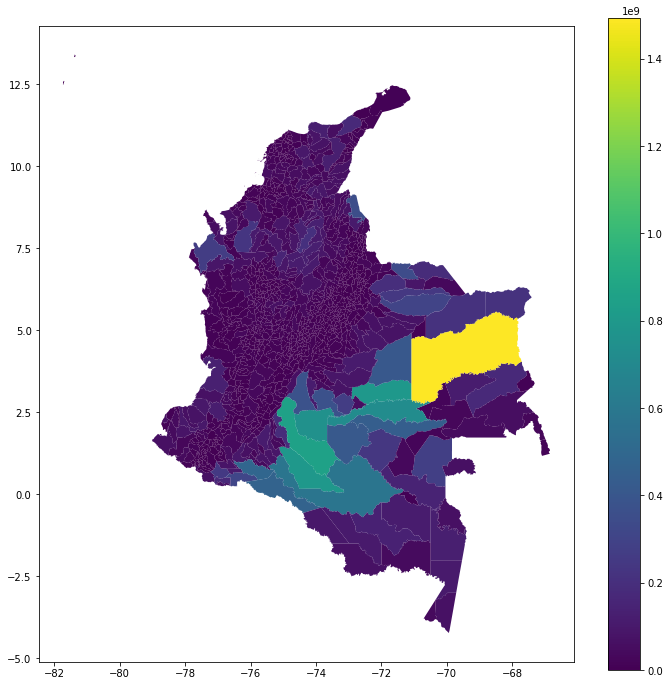

In [6]:
date = pd.to_datetime('2020-07-31')
column = 'deforestation_average_deforestation_average'
df_geo[df_geo.date == date].plot(figsize = (12,12), column = column, legend = True)

In [37]:
import geopandas
df_def = geopandas.read_file('/home/minigonche/Dropbox/Projects/malaria_mining/data/pipeline_data/raw/deforestation/deforestation_2000_2020.shp')
df_def

,date,deforestat,count,geometry
0,1009756800000,1,1,"POLYGON ((-79.90971 9.08699, -79.90971 9.09597..."
1,1009756800000,1,3,"MULTIPOLYGON (((-79.90073 9.06004, -79.90073 9..."
2,1009756800000,1,1,"POLYGON ((-79.90971 8.80851, -79.90971 8.81750..."
3,1009756800000,1,1,"POLYGON ((-79.90971 8.75461, -79.90971 8.76360..."
4,1009756800000,1,1,"POLYGON ((-79.90971 8.66478, -79.90971 8.67377..."
...,...,...,...,...
1680161,1609372800000,0,1,"POLYGON ((-66.38108 -4.44164, -66.38108 -4.432..."
1680162,1609372800000,0,12,"MULTIPOLYGON (((-66.39007 -4.50452, -66.39905 ..."
1680163,1609372800000,0,1,"POLYGON ((-66.38108 -4.69316, -66.38108 -4.684..."
1680164,1609372800000,0,1,"POLYGON ((-66.38108 -4.77401, -66.38108 -4.765..."


In [39]:
df_def.date = pd.to_datetime(df_def.date, unit='ms')

<AxesSubplot:>

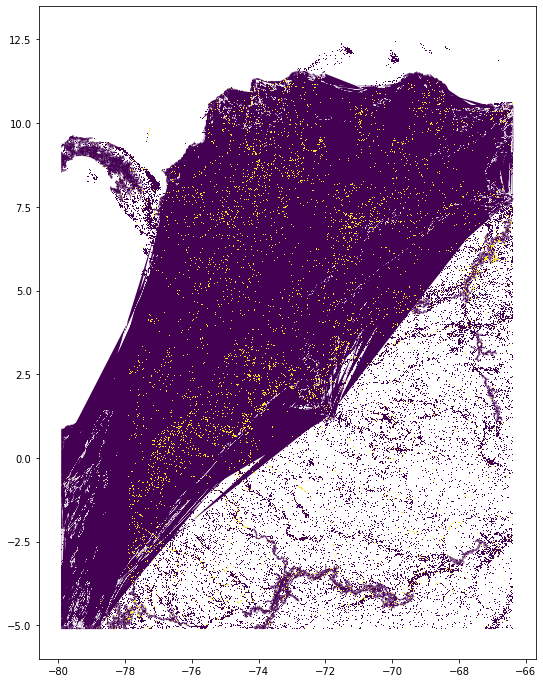

In [41]:
date = pd.to_datetime('2020-12-31')
df_def[df_def.date == date].plot(figsize=(12,12), column = 'deforestat') 


In [4]:
flow.run()

Starts Flow: Basic Malaria
   Loads Initial Geography
   Loads Data
      Loads Vector Data
      Found 2 elements
         Extracts 1 of 2: Gold Stock Price (gold_stock_price) 
         Extracts 2 of 2: Malaria (malaria) 
      Done
      
      Loads Matrix Data
      Found 0 elements
      Done
      ------------------
   Embedds Data
   Clusters Data
   Builds Final Geometry
Flow Ended
Done
-----------------


In [8]:


# Loads Data
# ----------------------
flow.df_vector, flow.df_matrix = flow.loadData(flow.geography)
flow.data_loaded = True


Loads Vector Data
Found 2 elements
   Extracts 1 of 2: Gold Stock Price (gold_stock_price) 
   Extracts 2 of 2: Malaria (malaria) 
Done

Loads Matrix Data
Found 0 elements
Done
------------------


In [5]:
flow.df_vector

,ID,date,gold_stock_price_value,malaria_num_cases
0,54743,2006-01-31,NaN,569.743717
1,52352,2006-01-31,NaN,894.454923
2,25019,2006-01-31,NaN,870.375268
3,19300,2006-01-31,NaN,729.977210
4,68547,2006-01-31,NaN,449.429277
...,...,...,...,...
215419,5541,2021-12-31,1791.045443,NaN
215420,23189,2021-12-31,1791.045443,NaN
215421,15600,2021-12-31,1791.045443,NaN
215422,23162,2021-12-31,1791.045443,NaN


In [6]:
# Embbeds Data
# ----------------------
flow.embeddData()
flow.data_embedded = True

flow.df_embedded_vector

KeyError: 'malaria_num_cases_total'

In [7]:
# Clusters Data
# ----------------------
flow.clusterData()
flow.data_clustered = True
flow.clustered_ids

,ID,cluster_id
0,44847,2
1,44110,0
2,44650,3
3,44560,3
4,54172,3
...,...,...
1117,5483,1
1118,5266,3
1119,5480,2
1120,5475,0


In [8]:
# Builds final geography
# ----------------------
flow.buildFinalGeography()


In [9]:
flow.final_geography

,ID,geometry
0,0,"MULTIPOLYGON (((-77.22701 0.68015, -77.22704 0..."
1,1,"MULTIPOLYGON (((-77.48686 1.26153, -77.48678 1..."
2,2,"MULTIPOLYGON (((-77.56230 0.93689, -77.56225 0..."
3,3,"MULTIPOLYGON (((-76.18574 0.65018, -76.18577 0..."
4,4,"MULTIPOLYGON (((-76.64121 0.25731, -76.65128 0..."


<AxesSubplot:>

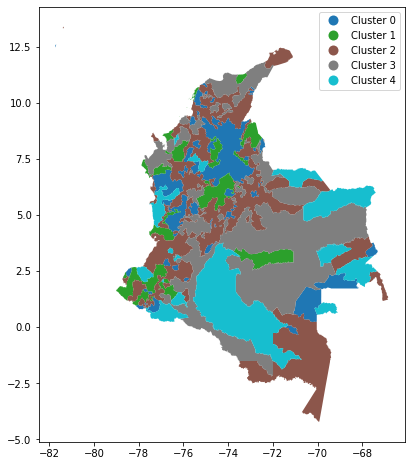

In [10]:
flow.final_geography[CLUSTER_ID] = flow.final_geography[ID].apply(lambda i : f"Cluster {i}")
flow.final_geography.plot(column = CLUSTER_ID, figsize = (8,8), legend=True)

In [13]:
df =pd.DataFrame(flow.clusterer.sklearn_clusterer.cluster_centers_)
df.columns = flow.df_embedded_vector.columns[1:]
df

,coca_coca_total,gold_stock_price_value
0,-0.042418,0.178869
1,0.396672,-0.015313
2,-0.011634,-0.095204
3,0.017010,-0.335084
4,-0.422757,-0.338038


In [3]:
import pandas as pd

In [6]:
df = pd.read_csv("/home/minigonche/Dropbox/Projects/malaria_mining/data/cleaned/malaria_cases/V.1/anonymized_individual_data.csv", parse_dates=['date'])
df

,area_type,resolution,confirmed,desmovilizados,desplazados,age,type_of_confirmation,ethnic_group,event,date,...,country,individual_id,gender,victima_de_violencia_armada,num_cases,muni_id,notification_muni_id,residence_muni_id,ocupation_id,resolution_id
0,CABECERA,VIVO (A),CONFIRMADO,NO,SI,31,CONFIRMADO POR LABORATORIO,INDÍGENA,MALARIA FALCIPARUM,2006-10-01,...,Colombia,ff08fc24a07b54abb004f9704d2cce7ce1f20a1a5ead19...,MASCULINO,NO,1,5120.0,5120,5120.0,OBREROS DE CARGA,VIVO (A)
1,AREA RURAL DISPERSA,VIVO (A),CONFIRMADO,NO,NO,34,CONFIRMADO POR LABORATORIO,"NEGRO, MULATO, AFROCOLOMBIANO O AFRODESCENCIENTE",MALARIA VIVAX,2006-12-28,...,Colombia,d9145536d2d69103aae7b943d05c12963394e4fc204519...,MASCULINO,NO,1,5101.0,66400,66400.0,NO DEFINIDO,VIVO (A)
2,CENTRO POBLADO,VIVO (A),CONFIRMADO,NO,NO,34,CONFIRMADO POR LABORATORIO,OTRAS ETNIAS,MALARIA FALCIPARUM,2006-12-25,...,Colombia,409173bbbaf62576a699529281cdffb178fbdc76a55f1b...,MASCULINO,NO,1,5042.0,13244,13244.0,LIMPIADORES DE FACHADAS Y DESHOLLINADORES,VIVO (A)
3,AREA RURAL DISPERSA,VIVO (A),CONFIRMADO,NO,NO,44,CONFIRMADO POR LABORATORIO,OTRAS ETNIAS,MALARIA FALCIPARUM,2006-01-20,...,Colombia,95e8f981deaf558c9cb3dc67089d497d2e8750525ffec8...,FEMENINO,NO,1,5142.0,5045,5142.0,NO DEFINIDO,VIVO (A)
4,CENTRO POBLADO,VIVO (A),CONFIRMADO,NO,NO,24,CONFIRMADO POR LABORATORIO,OTRAS ETNIAS,MALARIA VIVAX,2006-11-28,...,Colombia,c4eca5bb8520eae012cf9249468ece17bdb83f7f8dc11f...,MASCULINO,NO,1,5101.0,68101,5101.0,NO DEFINIDO,VIVO (A)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825907,AREA RURAL DISPERSA,VIVO (A),CONFIRMADO,NO,NO,121,CONFIRMADO POR LABORATORIO,OTRAS ETNIAS,MALARIA COMPLICADA,2019-03-16,...,NO DEFINIDO,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,MASCULINO,NO,1,NaN,25878,25878.0,NO DEFINIDO,VIVO (A)
825908,AREA RURAL DISPERSA,VIVO (A),CONFIRMADO,NO,NO,121,CONFIRMADO POR LABORATORIO,OTRAS ETNIAS,MALARIA COMPLICADA,2019-08-21,...,NO DEFINIDO,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,FEMENINO,NO,1,NaN,52001,52001.0,NO DEFINIDO,VIVO (A)
825909,AREA RURAL DISPERSA,VIVO (A),CONFIRMADO,NO,NO,121,CONFIRMADO POR LABORATORIO,OTRAS ETNIAS,MALARIA COMPLICADA,2019-07-06,...,NO DEFINIDO,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,MASCULINO,NO,1,NaN,52001,52001.0,NO DEFINIDO,VIVO (A)
825910,AREA RURAL DISPERSA,VIVO (A),CONFIRMADO,NO,NO,121,CONFIRMADO POR LABORATORIO,OTRAS ETNIAS,MALARIA COMPLICADA,2019-09-07,...,NO DEFINIDO,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,MASCULINO,NO,1,NaN,73001,73001.0,NO DEFINIDO,VIVO (A)


In [20]:
df['year'] = df.date.dt.year
df_temp = df[['year','event','num_cases']].groupby(['year','event']).sum().reset_index()
df_temp.groupby('event').mean()

,year,num_cases
event,,
MALARIA ASOCIADA (FORMAS MIXTAS),2012.5,937.428571
MALARIA COMPLICADA,2012.5,615.571429
MALARIA FALCIPARUM,2012.5,23577.214286
MALARIA MALARIE,2010.5,27.250000
MALARIA VIVAX,2012.5,36022.357143
MORTALIDAD POR MALARIA,2013.5,17.000000


In [24]:
df_temp = df[['year','num_cases']].groupby(['year']).sum().reset_index()
df_temp.mean()

year          2012.500000
num_cases    61182.714286
dtype: float64

<AxesSubplot:xlabel='date', ylabel='Count'>

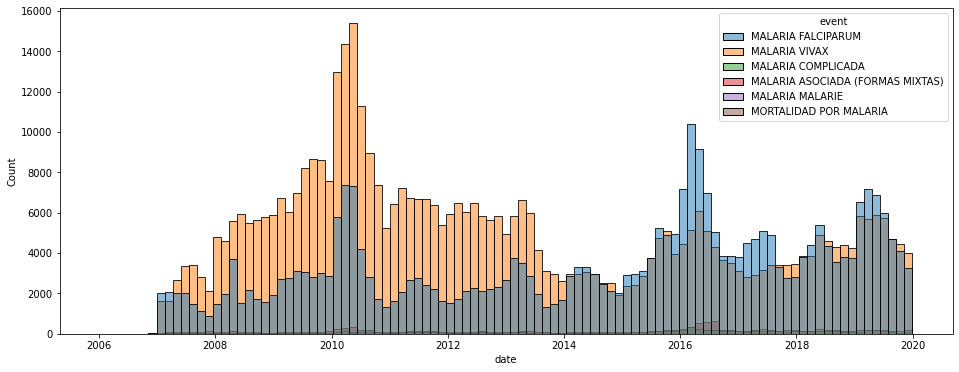

In [15]:
plt.figure(figsize=(16, 6))
sns.histplot(data = df, x = 'date', hue = 'event')


In [25]:
df.columns

Index(['area_type', 'resolution', 'confirmed', 'desmovilizados', 'desplazados',
       'age', 'type_of_confirmation', 'ethnic_group', 'event', 'date',
       'employment_group', 'population_group', 'foreigner_index',
       'madres_comunitarias', 'migrantes', 'ocupation', 'country',
       'individual_id', 'gender', 'victima_de_violencia_armada', 'num_cases',
       'muni_id', 'notification_muni_id', 'residence_muni_id', 'ocupation_id',
       'resolution_id', 'year'],
      dtype='object')

In [2]:
import geopandas

/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [15]:
import geopandas
ID = 'ID'
ID_1 = 'ID_1'
ID_2 = 'ID_2'

ADJACENCY = "adjacency"

df = geopandas.read_file('/home/minigonche/Dropbox/Projects/malaria_mining/data/cleaned/geo/departments/departments.shp')
df = df.rename(columns = {'depto_id':'ID'})




,ID_x,ID_y
0,91,91
1,91,5
2,91,81
3,91,88
4,91,8
...,...,...
1084,99,70
1085,99,73
1086,99,76
1087,99,97


In [18]:
# Global matrix
df_matrix = df[[ID]].drop_duplicates().merge(df[[ID]].drop_duplicates(), how='cross').rename(columns={f"{ID}_x" : ID_1, f"{ID}_y" : ID_2})

df.geometry = df.geometry.to_crs('EPSG:3395').buffer(50)
df_cross = geopandas.sjoin(df, df).reset_index().drop('geometry', axis = 1)
df_cross.rename(columns={f"{ID}_left" : ID_1, f"{ID}_right" : ID_2}, inplace = True)
df_cross = df_cross[[ID_1, ID_2]].copy()
df_cross[ADJACENCY] = 1


df_matrix = df_matrix.merge(df_cross, how='left').fillna(0)
df_matrix

,ID_1,ID_2,adjacency
0,91,91,1.0
1,91,5,0.0
2,91,81,0.0
3,91,88,0.0
4,91,8,0.0
...,...,...,...
1084,99,70,0.0
1085,99,73,0.0
1086,99,76,0.0
1087,99,97,0.0


In [5]:
df = geopandas.read_file('/home/minigonche/Dropbox/Projects/malaria_mining/data/cleaned/geo/municipalities/municipalities.shp')
df

,muni_id,dep_name,muni_name,depto_id,geometry
0,5467,Antioquia,Montebello,5,"POLYGON ((-75.57280 6.02282, -75.57272 6.02285..."
1,5475,Antioquia,Murindo,5,"POLYGON ((-76.67121 7.02387, -76.65716 7.01891..."
2,5480,Antioquia,Mutata,5,"POLYGON ((-76.49161 7.55006, -76.49154 7.55001..."
3,5266,Antioquia,Envigado,5,"POLYGON ((-75.48477 6.18982, -75.48123 6.18514..."
4,5483,Antioquia,Narino,5,"POLYGON ((-75.24353 5.68065, -75.22769 5.67609..."
...,...,...,...,...,...
1117,97889,Vaupes,Yavarate (Cor. Departamental),97,"POLYGON ((-69.99566 0.54662, -69.99568 0.54653..."
1118,99001,Vichada,Puerto Carreno,99,"POLYGON ((-67.77266 6.30879, -67.77266 6.30878..."
1119,99524,Vichada,La Primavera,99,"POLYGON ((-70.62617 4.76763, -70.62617 4.76755..."
1120,99624,Vichada,Santa Rosalia,99,"POLYGON ((-70.64148 5.39873, -70.64141 5.39879..."


In [8]:
df_dep = df[['dep_name','depto_id','geometry']].dissolve(by='dep_name').reset_index()[['dep_name','depto_id','geometry']]
df_dep

,dep_name,depto_id,geometry
0,Amazonas,91,"POLYGON ((-70.49211 -2.47790, -70.49214 -2.477..."
1,Antioquia,5,"POLYGON ((-75.90445 5.48149, -75.90453 5.48153..."
2,Arauca,81,"POLYGON ((-69.73801 6.50079, -69.73799 6.50077..."
3,Archipielago De San Andres,88,"MULTIPOLYGON (((-81.69996 12.56728, -81.69987 ..."
4,Atlantico,8,"POLYGON ((-74.87195 10.32702, -74.87196 10.326..."
5,Bogota,11,"POLYGON ((-74.18447 4.64875, -74.17798 4.65505..."
6,Bolivar,13,"MULTIPOLYGON (((-76.17828 9.37686, -76.17836 9..."
7,Boyaca,15,"POLYGON ((-73.45045 4.88289, -73.45049 4.88281..."
8,Caldas,17,"POLYGON ((-75.33685 5.04534, -75.33280 5.04591..."
9,Caqueta,18,"POLYGON ((-75.49415 0.77235, -75.49421 0.77229..."


/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms.community import asyn_lpa_communities

ID = 'ID'

G = nx.DiGraph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

res = asyn_lpa_communities(G, weight = 'weight')

# Builds return object
results = pd.DataFrame({
    ID: ['a','b','c','d','e','f'],
    "CLUSTER_ID": None
})

i = 0
for r in res:
    results.loc[results[ID].isin(r),'CLUSTER_ID'] = i
    i += 1

results

,ID,CLUSTER_ID
0,a,0
1,b,0
2,c,1
3,d,2
4,e,3
5,f,1


In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': [1, 1, 2, 2], 'B': [1, 2, 3, 4],'C': np.random.randn(4)})
df_out = df.groupby('A').agg({'B': 'max', 'C': 'sum'})

In [3]:
df.drop('A', axis = 1, inplace= True)

In [4]:
df

,B,C
0,1,2.197456
1,2,-0.240377
2,3,-1.370971
3,4,0.172323


In [7]:
df_out.index


Int64Index([1, 2], dtype='int64', name='A')

/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'temp.csv'

In [1]:
import pandas as pd
import geopandas

/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = geopandas.read_file('temp/deforestation_2000_2020.shp')

df

,year,deforestat,count,geometry
0,2001.0,1,1,"POLYGON ((-79.90971 9.08699, -79.90971 9.09597..."
1,2001.0,1,3,"MULTIPOLYGON (((-79.90073 9.06004, -79.90073 9..."
2,2001.0,1,1,"POLYGON ((-79.90971 8.80851, -79.90971 8.81750..."
3,2001.0,1,1,"POLYGON ((-79.90971 8.75461, -79.90971 8.76360..."
4,2001.0,1,1,"POLYGON ((-79.90971 8.66478, -79.90971 8.67377..."
...,...,...,...,...
1680161,2020.0,0,1,"POLYGON ((-66.38108 -4.44164, -66.38108 -4.432..."
1680162,2020.0,0,12,"MULTIPOLYGON (((-66.39007 -4.50452, -66.39905 ..."
1680163,2020.0,0,1,"POLYGON ((-66.38108 -4.69316, -66.38108 -4.684..."
1680164,2020.0,0,1,"POLYGON ((-66.38108 -4.77401, -66.38108 -4.765..."


,year,deforestat,count,geometry
1443569,2018.0,1,1,"POLYGON ((-79.90971 8.91631, -79.90971 8.92529..."
1443570,2018.0,1,1,"POLYGON ((-79.90971 8.69173, -79.90971 8.70072..."
1443571,2018.0,1,1,"POLYGON ((-79.90971 0.05892, -79.90971 0.06791..."
1443579,2018.0,1,1,"POLYGON ((-79.90971 -3.55230, -79.90971 -3.543..."
1443580,2018.0,1,1,"POLYGON ((-79.90971 -3.98350, -79.90971 -3.974..."
...,...,...,...,...
1521917,2018.0,1,2,"POLYGON ((-66.38108 7.20951, -66.38108 7.22748..."
1521931,2018.0,1,1,"POLYGON ((-66.38108 6.04170, -66.38108 6.05069..."
1521941,2018.0,1,4,"MULTIPOLYGON (((-66.38108 4.93677, -66.38108 4..."
1521947,2018.0,1,1,"POLYGON ((-66.38108 4.35287, -66.38108 4.36185..."


<AxesSubplot:>

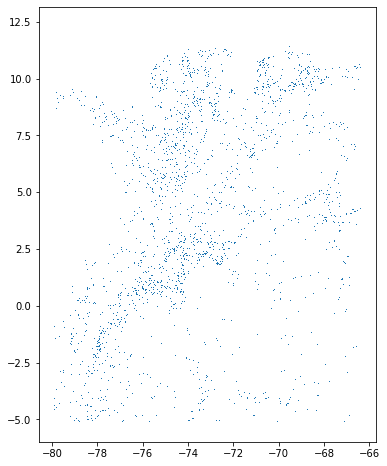

In [4]:
year = 2018
df_temp = df[df.year == year]
df_temp = df_temp[df_temp.deforestat == 1]

display(df_temp)

df_temp.plot(figsize = (8,8))